二维码又称QR Code，是一个近几年来流行的一种编码方式，使用黑白矩形图案表示二进制数据，被设备扫描后可获取其中所包含的信息。本教程将展示如何在原有黑白图片的基础上，给二维码添加一些色彩和动态效果，也可以说是给二维码换个皮肤。首先，简单了解一下二维码的基础知识。

### 二维码的基础知识

一个普通二维码的基本结构如下:

![](./static/images/qrcode_structure.png)

**定位图案**

定位图案，用于标记二维码的矩形大小。之所以三个而不是四个意思就是三个就可以标识一个矩形了。这个在转换的时候需要保留。

**功能性数据**

功能性数据用于存放一些格式化数据的，比如格式信息和版本信息。

**数据码和纠错码**

除了上述的那些地方，剩下的地方存放数据码和纠错码。

以上就是二维码的基本结构，下面就可以二维码图片的转换了。

### 二维码简单背景替换

In [278]:
# 导入需要使用的Python库
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [337]:
# 读取二维码图片
qrcode = Image.open('./static/images/qrcode.png').convert("RGBA")

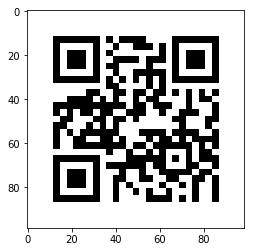

In [338]:
# 转换二维码为合适的尺寸
src_size = qrcode.size
qrcode = qrcode.resize((int(src_size[0]/3), int(src_size[1]/3)))

plt.imshow(qrcode)
plt.show()

In [339]:
# 读取新的图片
version = 5  # 二维码版本
x = 12       # 二维码起始坐标x
y = 12      # 二维码起始坐标y

bg = Image.open('./static/images/luffy.jpeg').convert("RGBA")

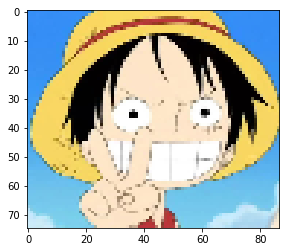

In [340]:
# 将新的图片转换为合适的尺寸
if bg.size[0] < bg.size[1]:
    bg = bg.resize((qrcode.size[0]-x*2, (qrcode.size[0]-x)*int(bg.size[1]/bg.size[0])))
else:
    bg = bg.resize(((qrcode.size[1]-y)*int(bg.size[0]/bg.size[1]), qrcode.size[1]-y*2)) 
plt.imshow(bg)
plt.show()

In [341]:
'''
循环二维码图片中各个像素点
其中三个定位图案和有效数据不能替换
这里的坐标位置以本教程的二维码为例，如有不同，需要修改version
'''
align_location = [
    (6, 18), (6, 22), (6, 26), (6, 30), (6, 34), (6, 22, 38), (6, 24, 42), (6, 26, 46), (6, 28, 50), (6, 30, 54), (6, 32, 58), (6, 34, 62), (6, 26, 46, 66), (6, 26, 48, 70), (6, 26, 50, 74), (6, 30, 54, 78), (6, 30, 56, 82), (6, 30, 58, 86), (6, 34, 62, 90), (6, 28, 50, 72, 94), (6, 26, 50, 74, 98), (6, 30, 54, 78, 102), (6, 28, 54, 80, 106), (6, 32, 58, 84, 110), (6, 30, 58, 86, 114), (6, 34, 62, 90, 118), (6, 26, 50, 74, 98, 122), (6, 30, 54, 78, 102, 126), (6, 26, 52, 78, 104, 130), (6, 30, 56, 82, 108, 134), (6, 34, 60, 86, 112, 138), (6, 30, 58, 86, 114, 142), (6, 34, 62, 90, 118, 146), (6, 30, 54, 78, 102, 126, 150), (6, 24, 50, 76, 102, 128, 154), (6, 28, 54, 80, 106, 132, 158), (6, 32, 58, 84, 110, 136, 162), (6, 26, 54, 82, 110, 138, 166), (6, 30, 58, 86, 114, 142, 170)
    ]

ignore_points = []
if version > 1:
    location = align_location[version-2]
    for a in range(len(location)):
        for b in range(len(location)):
            if not ((a==b==0) or (a==len(location)-1 and b==0) or (a==0 and b==len(location)-1)):
                for i in range(3*(location[a]-2), 3*(location[a]+3)):
                    for j in range(3*(location[b]-2), 3*(location[b]+3)):
                        ignore_points.append((i,j))
                      
        
for i in range(qrcode.size[0]-x*2):
    for j in range(qrcode.size[1]-y*2):
        # 忽略左上角定位图案
        if i<24 and j<24: 
            continue
        # 忽略右上角定位图案
        elif i<24 and j>qrcode.size[1]-49: 
            continue
        # 忽略左下角定位图案
        elif i>qrcode.size[0]-49 and j<24: 
            continue
        elif i%3==1 and j%3==1:
            continue
        # 背景中透明的略不做处理
        elif bg.getpixel((i,j))[3]==0:
            continue
        elif (i,j) in ignore_points:
            continue
        else:
            # 用新图片上的像素替换原有二维码上
            qrcode.putpixel((i+x,j+y), bg.getpixel((i,j)))

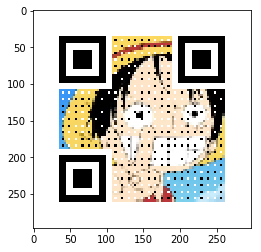

In [342]:
# 显示新的二维码图片
qrcode = qrcode.resize(src_size)
plt.imshow(qrcode)
plt.show()

简单的转换就完成了，最后展示下如何生成一个有动态效果的二位码。

### 动态二维码

步骤和上面类似，区别在于使用的是二维码加动图GIF。先将上面的过程封装为一个函数，内如如下:

In [145]:
def transfer(qrcode, bg):
    src_size = (qrcode.size[0], qrcode.size[1])
    if bg.size[0] < bg.size[1]:
        bg = bg.resize((qrcode.size[0]-24, (qrcode.size[0]-24)*int(bg.size[1]/bg.size[0])))
    else:
        bg = bg.resize(((qrcode.size[1]-24)*int(bg.size[0]/bg.size[1]), qrcode.size[1]-24)) 
        
    align_location = [
    (6, 18), (6, 22), (6, 26), (6, 30), (6, 34), (6, 22, 38), (6, 24, 42), (6, 26, 46), (6, 28, 50), (6, 30, 54), (6, 32, 58), (6, 34, 62), (6, 26, 46, 66), (6, 26, 48, 70), (6, 26, 50, 74), (6, 30, 54, 78), (6, 30, 56, 82), (6, 30, 58, 86), (6, 34, 62, 90), (6, 28, 50, 72, 94), (6, 26, 50, 74, 98), (6, 30, 54, 78, 102), (6, 28, 54, 80, 106), (6, 32, 58, 84, 110), (6, 30, 58, 86, 114), (6, 34, 62, 90, 118), (6, 26, 50, 74, 98, 122), (6, 30, 54, 78, 102, 126), (6, 26, 52, 78, 104, 130), (6, 30, 56, 82, 108, 134), (6, 34, 60, 86, 112, 138), (6, 30, 58, 86, 114, 142), (6, 34, 62, 90, 118, 146), (6, 30, 54, 78, 102, 126, 150), (6, 24, 50, 76, 102, 128, 154), (6, 28, 54, 80, 106, 132, 158), (6, 32, 58, 84, 110, 136, 162), (6, 26, 54, 82, 110, 138, 166), (6, 30, 58, 86, 114, 142, 170)
    ]

    version = 5

    ignore_points = []
    if version > 1:
        location = align_location[version-2]
        for a in range(len(location)):
            for b in range(len(location)):
                if not ((a==b==0) or (a==len(location)-1 and b==0) or (a==0 and b==len(location)-1)):
                    for i in range(3*(location[a]-2), 3*(location[a]+3)):
                        for j in range(3*(location[b]-2), 3*(location[b]+3)):
                            ignore_points.append((i,j))
        
    for i in range(qrcode.size[0]-24):
        for j in range(qrcode.size[1]-24):
            # 忽略左上角定位图案
            if i<24 and j<24: 
                continue
            # 忽略右上角定位图案
            elif i<24 and j>qrcode.size[1]-49:  
                continue
            # 忽略左下角定位图案
            elif i>qrcode.size[0]-49 and j<24: 
                continue
            elif i%3==1 and j%3==1:
                continue
            # 背景中透明的略不做处理
            elif bg.getpixel((i,j))[3]==0:  
                continue
            elif (i,j) in ignore_points:
                continue
            else:
                # 用新图片上的像素替换原有二维码上
                qrcode.putpixel((i+12,j+12), bg.getpixel((i,j)))
    return qrcode

In [146]:
# 二维码图片
qrcode = Image.open('qrcode.png').convert("RGBA")

Gif图如下:

![](./static/images/penguin.gif)

In [147]:
# 读取Gif图片
gif = Image.open('./static/images/penguin.gif')
duration = gif.info.get('duration', 0)
bg_frames = []

# 循环Gif图片中的所有帧数
try:
    i= 0
    while 1:
        gif.seek(i)
        gif_copy = gif.copy()
        if i == 0: 
            palette = gif_copy.getpalette()
        else:
            gif_copy.putpalette(palette)
        bg_frames.append(gif_copy.convert("RGBA"))
        i += 1
except EOFError:
    pass

In [148]:
# 循环图片列表，并将结果存到一个新的数组中
import numpy

frames = []
for i in bg_frames:
    frames.append(numpy.array(transfer(qrcode, i)))

In [149]:
# 合并图片组到新的gif文件中
import imageio

imageio.mimsave('qrcode.gif', frames)

结果如下：

![](static/images/qrcode.gif)